#### Mating data process pipeline

In [2]:
import sys
sys.path.append("../")
import os

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import trange

from cellmating.utils import file_traverse, load_from_pkl
from cellmating.io import imread, imsave

from script_wlli.mating_feature_extract import extract_mating_features, stack_features

In [3]:
root = "/media/wlli/T7/data/mating_all/"
file_list = file_traverse(root, file_regular=r".*/selected/.*.tif")
print("totle images: ", len(file_list))

totle images:  195


In [ ]:
all_images_feature_over_time = {}
for i in trange(0, 10):
    file_name = file_list[i]
    try:
        image = imread(file_name)
        g = load_from_pkl(file_name[:-4]+".network")
        key = int(file_name.split("_")[-1][:-4])
        key = np.unique(image[-1,-1][image[-1,-2] == key])[0]%1000
        data = extract_mating_features(image, g, key)

        stack_features(all_images_feature_over_time, data, os.path.basename(file_name))
    except Exception as error:
    # handle the exception
        print(file_name," : ", error)

 10%|████▍                                       | 1/10 [00:18<02:46, 18.48s/it]WARNING:root:cell id=58 not exist at time=14
/home/wlli/project_in_wd/pipeline_data_process_mating_dynamic/script_wlli/mating_feature_extract.py:75: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data[key] = pd.concat([all_data[key], data[key]])
 20%|████████▊                                   | 2/10 [00:36<02:24, 18.02s/it]

In [ ]:
# dump_to_pkl(all_images_feature_over_time,"./all_time_new.obj")
# for key in all_images_feature_over_time:
#     data = all_images_feature_over_time[key]
#     data.to_csv("./csv/"+key+".csv")

In [8]:
from cellmating.resolution import DIC_RESOLUTION

In [9]:
for k,v in DIC_RESOLUTION.items():
    print(k,v)
    index = all_obj.image.str.contains(pat=k, regex=False)
    all_obj.loc[index, "resolution"] = v

20220802_YAV2104xYAV2105_001 {'reso': 0.1944, 'bin': 3}


NameError: name 'all_obj' is not defined

In [21]:
# index = all_obj.image.str.contains(pat=k, regex=False)
all_time

{'-0':      p   m  p_type  m_type  p_start  p_area     p_axis  p_eccentricity  \
 0   57  28       1       2     -101   619.0  35.867525        0.776547   
 1   57  59       1       2     -101   619.0  35.867525        0.776547   
 2   23  59       1       2     -118   760.0  39.528561        0.783037   
 3   51  59       1       2     -107   544.0  27.946717        0.454279   
 4   52  59       1       2     -107   486.0  26.893912        0.514029   
 ..  ..  ..     ...     ...      ...     ...        ...             ...   
 0   19  10       1       2     -118  1754.0  69.459717        0.877205   
 1    5  10       1       2     -127  1628.0  60.154919        0.815060   
 2    7  10       1       2     -127  1796.0  60.496434        0.778493   
 3   19  10       1       2     -118  1754.0  69.459717        0.877205   
 4   27  10       1       2      -45  4310.0  94.811169        0.719860   
 
     m_start  m_area  ...   m_angle  p_angle_index  m_angle_index  center_dist  \
 0      -1

In [71]:
all_obj.image

0    20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...
1    20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...
2    20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...
3    20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...
4    20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...
                           ...                        
2         20230315_h90_hpm_03_08_R3D._rigid_003014.tif
0         20230315_h90_hpm_03_08_R3D._rigid_004003.tif
1         20230315_h90_hpm_03_08_R3D._rigid_004003.tif
2         20230315_h90_hpm_03_08_R3D._rigid_004003.tif
3         20230315_h90_hpm_03_08_R3D._rigid_004003.tif
Name: image, Length: 908, dtype: object

#### areas

In [51]:
data = all_obj[['p','p_area','image', 'resolution']]
data = data.drop_duplicates()
data.p_area = data.p_area * (data.resolution**2)
print(data.shape)
sns.displot(data.p_area)

KeyError: "['resolution'] not in index"

(639, 3)


/home/wlli/miniconda3/envs/yeast/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


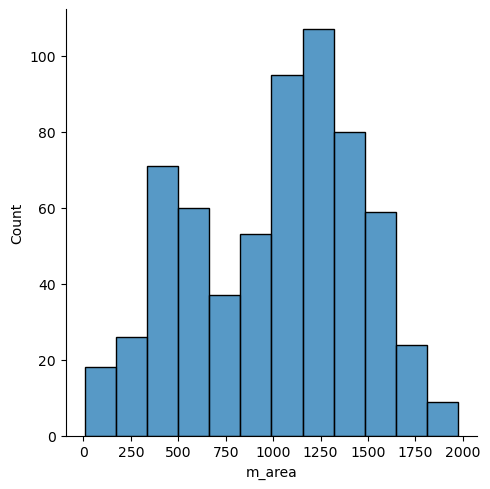

In [40]:
data = all_obj[['m','m_area','image']]
data = data.drop_duplicates()
print(data.shape)
sns.displot(data.m_area)

### number of neighbor

In [46]:
data = all_obj[["p","m","image","ref"]]

In [47]:
m_nei = data[data.ref == data.p].groupby("image").m.count().value_counts()
p_nei = data[data.ref == data.m].groupby("image").p.count().value_counts()

<Axes: xlabel='m', ylabel='count'>

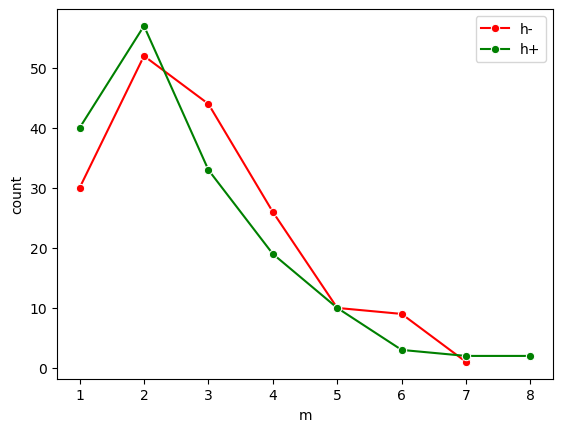

In [48]:
sns.lineplot(m_nei, marker="o", label = "h-", c="red")
sns.lineplot(p_nei, marker="o", label = "h+", c="green")

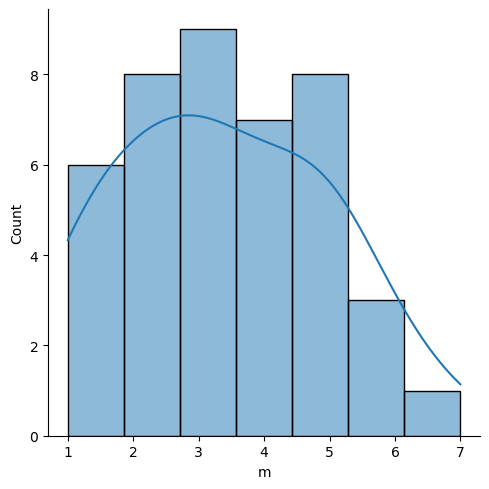

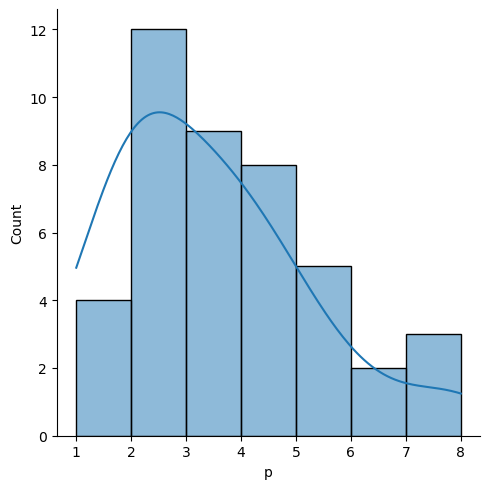

In [35]:
sns.displot(m_nei, label = "h-", kde=True)
sns.displot(p_nei, label = "h+", kde=True)

In [ ]:
number_of_neibor = []
mated = data_table[data_table.flag]
for i in range(0, mated.shape[0]):
    p = mated.iloc[i].p
    m = mated.iloc[i].m
    image_id = mated.iloc[i].image_id
    number_p = data_table.loc[(data_table.image_id == image_id) & (data_table.p == p)].m.count()
    number_m = data_table.loc[(data_table.image_id == image_id) & (data_table.m == m)].p.count()
    number_of_neibor.append([image_id, number_p, number_m])

#### Counting

In [36]:
from cellmating.flourescent.fluorescent_classification import FluorescentClassification
from cellmating.image_measure._meaure import ImageMeasure
import pandas as pd
import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
# data = pd.DataFrame(
#     columns=["image_id","p","m","p_start","p_area","p_axis","p_eccentricity",
#             "m_start","m_angle","m_axis","m_eccentricity",
#              "p_angle", "m_angle", "nearest_dist", "center_dist", "flag"])
data_list = []

In [33]:
for order in trange(0, len(file_list)):
    file_name = file_list[order]
    image = imread(file_name)
    cells=all_obj[order]
    g = load_from_pkl(file_name[:-4]+".network")
    key = int(file_name.split("_")[-1][:-4])
    key = np.unique(image[-1,-1][image[-1,-2] == key])[0]%1000
    test_mating = Mating(
        image = image,
        cells=all_obj[order],
        center = key,
        g = g)
    if test_mating.p is None:
        continue
    time_p = min(set(test_mating.cells[test_mating.p].frames).intersection(test_mating.cells[test_mating.m].frames))
    time_fusion = test_mating.cells[test_mating.center].start


    neiber_p = test_mating.neiber(center=test_mating.p,
                                  frame = time_p)
    neiber_p = neiber_p[test_mating.intensity_type[neiber_p] != 1]

    angles = test_mating.angles(test_mating.p, neiber_p, time_p)
    # distance = test_mating.distance(test_mating.p, neiber_p, time_p)[0]
    angles_index = test_mating.angles_index(test_mating.p, neiber_p, time_p)
    
    p_start = test_mating.cells[test_mating.p].start - time_fusion
    p_area = test_mating.cells[test_mating.p].area(frame=time_p)[0]
    p_axis_major_length = test_mating.cells[test_mating.p].axis_major_length(frame=time_p)[0]
    p_eccentricity = test_mating.cells[test_mating.p].eccentricities(frame=time_p)[0]

    for idx in range(0, len(neiber_p)):
        nei = neiber_p[idx]
        start = test_mating.cells[nei].start - time_fusion
        area = test_mating.cells[nei].area(frame=time_p)[0]
        axis_major_length = test_mating.cells[nei].axis_major_length(frame=time_p)[0]
        eccentricity = test_mating.cells[nei].eccentricities(frame=time_p)[0]
        distance = test_mating.measure[time_p].distance(test_mating.p, nei, ptype='label')[0,0,:2]
        if nei == test_mating.m:
            flag = True
        else:
            flag = False
        pair = [order, test_mating.p, nei, p_start, p_area, p_axis_major_length, p_eccentricity,
               start, area, axis_major_length, eccentricity,
               angles[idx][0], angles[idx][1], angles_index[idx][0], angles_index[idx][1], distance[0], distance[1], flag, test_mating.p]
        data_list.append(pair)

    neiber_m = test_mating.neiber(center=test_mating.m,
                                  frame = time_p)
    neiber_m = neiber_m[test_mating.intensity_type[neiber_m] != 2]

    angles = test_mating.angles(test_mating.m, neiber_m, time_p)
    # distance = test_mating.distance(test_mating.m, neiber_m, time_p)[0]
    angles_index = test_mating.angles_index(test_mating.m, neiber_m, time_p)
    
    m_start = test_mating.cells[test_mating.m].start - time_fusion
    m_area = test_mating.cells[test_mating.m].area(frame=time_p)[0]
    m_axis_major_length = test_mating.cells[test_mating.m].axis_major_length(frame=time_p)[0]
    m_eccentricity = test_mating.cells[test_mating.m].eccentricities(frame=time_p)[0]

    for idx in range(0, len(neiber_m)):
        nei = neiber_m[idx]
        start = test_mating.cells[nei].start - time_fusion
        area = test_mating.cells[nei].area(frame=time_p)[0]
        axis_major_length = test_mating.cells[nei].axis_major_length(frame=time_p)[0]
        eccentricity = test_mating.cells[nei].eccentricities(frame=time_p)[0]

        distance = test_mating.measure[time_p].distance(test_mating.m, nei, ptype='label')[0,0,:2]
        if nei == test_mating.p:
            flag = True
        else:
            flag = False
        pair = [order, nei, test_mating.m, start, area, axis_major_length, eccentricity,
                m_start, m_area, m_axis_major_length, m_eccentricity,
                angles[idx][1], angles[idx][0], angles_index[idx][1], angles_index[idx][0], distance[0], distance[1], flag, test_mating.m]
        data_list.append(pair)

  2%|█▍                                                                       | 1/50 [00:07<05:57,  7.29s/it]/home/wlli/miniconda3/envs/yeast/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
  8%|█████▊                                                                   | 4/50 [00:33<06:36,  8.61s/it]/home/wlli/miniconda3/envs/yeast/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
 26%|██████████████████▋                                                     | 13/50 [01:42<04:25,  7.18s/it]

 52%|█████████████████████████████████████▍                                  | 26/50 [03:16<03:17,  8.23s/it]/home/wlli/miniconda3/envs/yeast/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
 58%|█████████████████████████████████████████▊                              | 29/50 [03:45<03:15,  9.32s/it]/home/wlli/miniconda3/envs/yeast/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
 60%|███████████████████████████████████████████▏                            | 30/50 [03:54<03:03,  9.16s/it]/home/wlli/miniconda3/envs/yeast/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
 70%|██████████████████████████████████████████████████▍                     | 35/50 [04

 94%|███████████████████████████████████████████████████████████████████▋    | 47/50 [06:18<00:27,  9.16s/it]/home/wlli/miniconda3/envs/yeast/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
100%|████████████████████████████████████████████████████████████████████████| 50/50 [06:44<00:00,  8.10s/it]


In [309]:
data_table = pd.DataFrame(data_list,
    columns=["image_id","p","m","p_start","p_area","p_axis","p_eccentricity",
            "m_start","m_area","m_axis","m_eccentricity",
             "p_angle", "m_angle", "p_angle_index", "m_angle_index","center_dist", "nearest_dist", "flag", "ref"])

In [310]:
index = data_table.iloc[:,:-1].drop_duplicates().index
data_table = data_table.loc[index]

In [37]:
# data_table.to_csv("/media/wlli/T7/data/mating_all/figs/matingdata_2.csv")

#### number of neibor

In [38]:
all_obj

,p,m,p_start,p_area,p_axis,p_eccentricity,m_start,m_area,m_axis,m_eccentricity,...,neighbor_p,p_angle,m_angle,p_angle_index,m_angle_index,center_dist,nearest_dist,flag,ref,image
0,22,17,-82,353.0,26.322775,0.755779,-82,566.0,35.572232,0.808789,...,4,1.407846,1.065194,21,16,20.712271,2.146198,False,22,20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...
1,22,23,-82,353.0,26.322775,0.755779,-82,624.0,32.944792,0.679686,...,4,0.681276,0.371904,21,22,46.508039,19.356500,False,22,20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...
2,22,25,-82,353.0,26.322775,0.755779,-82,605.0,36.847581,0.819827,...,4,0.763337,1.043847,21,24,21.086621,2.848903,False,22,20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...
3,22,26,-82,353.0,26.322775,0.755779,-82,636.0,35.054838,0.749355,...,4,0.099781,1.292196,21,25,25.337668,2.126608,True,22,20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...
4,11,26,-82,965.0,43.834995,0.767325,-82,636.0,35.054838,0.749355,...,4,0.032257,0.702437,10,25,85.770900,53.033024,False,26,20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,39,29,-125,417.0,23.896388,0.359636,-137,200.0,23.979826,0.879449,...,4,0.169435,0.584243,35,26,102.688666,83.438602,False,39,20220802_YAV2104xYAV2105_001_11_R3D_REF_rigid_...
2,39,30,-125,417.0,23.896388,0.359636,-137,525.0,30.406426,0.689383,...,5,1.155695,1.094233,35,27,63.824249,40.997937,False,39,20220802_YAV2104xYAV2105_001_11_R3D_REF_rigid_...
3,39,32,-125,417.0,23.896388,0.359636,-137,406.0,26.821219,0.664969,...,2,1.465798,0.309066,35,29,88.909903,64.308035,False,39,20220802_YAV2104xYAV2105_001_11_R3D_REF_rigid_...
4,39,34,-125,417.0,23.896388,0.359636,-137,284.0,23.337591,0.727499,...,3,0.583107,1.047801,35,31,82.320345,62.038022,False,39,20220802_YAV2104xYAV2105_001_11_R3D_REF_rigid_...


In [39]:
number_of_neibor = []
mated = data_table[data_table.flag]
for i in range(0, mated.shape[0]):
    p = mated.iloc[i].p
    m = mated.iloc[i].m
    image_id = mated.iloc[i].image_id
    number_p = data_table.loc[(data_table.image_id == image_id) & (data_table.p == p)].m.count()
    number_m = data_table.loc[(data_table.image_id == image_id) & (data_table.m == m)].p.count()
    number_of_neibor.append([image_id, number_p, number_m])

NameError: name 'data_table' is not defined

In [241]:
number_of_neibor_table = pd.DataFrame(number_of_neibor,
    columns=["image_id","m", "p"])

In [265]:
number_m = number_of_neibor_table['m'].value_counts()
number_m = number_m[number_m.index<9]
number_p = number_of_neibor_table['p'].value_counts()
number_p = number_p[number_p.index<9]

<Axes: ylabel='m'>

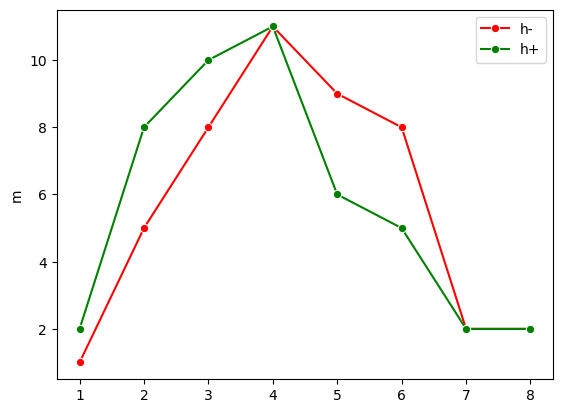

In [274]:
sns.lineplot(number_m, marker="o", label = "h-", c="red")
sns.lineplot(number_p, marker="o", label = "h+", c="green")
# plt.ylabel("Count")
# plt.xlabel("Number of Neighbor")
# plt.savefig("/media/wd/T7/data/mating_all/figs/NumberofNeighbor.png")

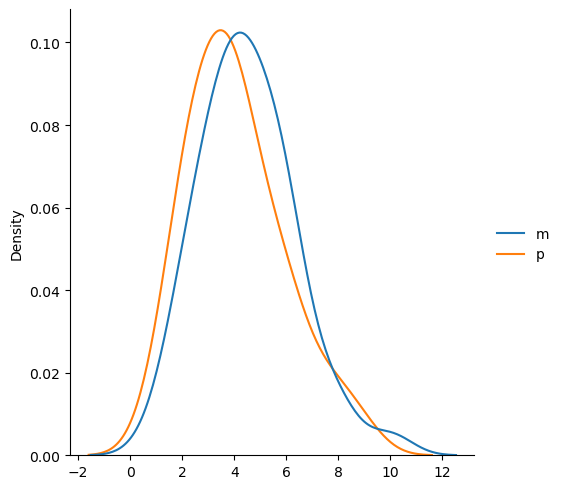

In [281]:
sns.displot(number_of_neibor_table.iloc[:,1:], kind="kde")
plt.savefig("/media/wd/T7/data/mating_all/figs/NumberofNeighbor_distribution.png")

#### angles

In [51]:
data

,p,m,p_type,m_type,p_start,p_area,p_axis,p_eccentricity,m_start,m_area,...,m_angle,p_angle_index,m_angle_index,center_dist,nearest_dist,flag,time_measure,time_0,ref,image
0,46,17,1,2,-97,442.0,25.881603,0.535848,-105,469.0,...,0.511088,41,13,96.016824,72.126559,False,8,105,46,example_for_mating0_003006.tif
1,46,22,1,2,-97,442.0,25.881603,0.535848,-105,669.0,...,0.879295,41,18,69.306428,45.937972,False,8,105,46,example_for_mating0_003006.tif
2,46,29,1,2,-97,442.0,25.881603,0.535848,-105,898.0,...,0.000546,41,24,35.395205,2.697824,False,8,105,46,example_for_mating0_003006.tif
3,19,58,1,2,-105,662.0,34.368690,0.694946,-86,350.0,...,0.660320,13,45,25.743607,2.838197,False,19,105,58,example_for_mating0_003006.tif
4,24,58,1,2,-105,702.0,37.836968,0.776227,-86,350.0,...,0.665798,16,45,21.910716,0.707110,False,19,105,58,example_for_mating0_003006.tif
5,46,58,1,2,-97,456.0,28.055049,0.670763,-86,350.0,...,0.907377,33,45,22.538953,2.273256,True,19,105,58,example_for_mating0_003006.tif


,index,p,m,p_type,m_type,p_start,p_area,p_axis,p_eccentricity,m_start,...,m_angle,p_angle_index,m_angle_index,center_dist,nearest_dist,flag,time_measure,time_0,ref,image
0,0,57,1,1,2,-101,506.0,27.994335,0.559940,-118,...,1.541710,47,0,109.291893,89.405763,False,17,118,57,20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...
1,1,57,2,1,2,-101,506.0,27.994335,0.559940,-118,...,0.994109,47,1,104.050693,79.000004,False,17,118,57,20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...
2,2,8,59,1,2,-118,698.0,40.866311,0.841773,-100,...,0.675238,4,46,81.917034,52.364408,False,18,118,59,20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...
3,3,18,59,1,2,-118,655.0,34.275588,0.699259,-100,...,0.081282,12,46,43.920034,15.387797,False,18,118,59,20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...
4,4,23,59,1,2,-118,724.0,37.881296,0.762872,-100,...,1.066366,15,46,26.891361,2.008671,False,18,118,59,20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,2,10,12,1,2,-82,1342.0,48.570417,0.667893,-82,...,1.509081,9,11,38.951153,0.329810,False,0,82,12,20230315_h90_hpm_03_08_R3D._rigid_003014.tif
904,0,19,10,1,2,-118,1438.0,50.305300,0.684300,-127,...,1.068277,16,8,39.737580,4.006710,True,9,127,19,20230315_h90_hpm_03_08_R3D._rigid_004003.tif
905,1,19,14,1,2,-118,1438.0,50.305300,0.684300,-127,...,0.304464,16,12,56.068366,9.250857,False,9,127,19,20230315_h90_hpm_03_08_R3D._rigid_004003.tif
906,2,5,10,1,2,-127,1379.0,54.751724,0.809144,-127,...,0.326773,4,9,42.746055,0.947146,False,0,127,10,20230315_h90_hpm_03_08_R3D._rigid_004003.tif


In [29]:
all_obj = all_time['-0']#pd.read_csv("../run/all_time_end.csv", index_col=0)
all_obj = all_obj.reset_index()

In [30]:
angles = all_obj[["p_angle","m_angle","flag"]].copy()
# angles[["p_angle","m_angle"]] = angles[["p_angle","m_angle"]]*180/np.pi
index = list(set(angles[~angles.flag].sample(60).index).union(set(angles[angles.flag].index)))
angles = angles.loc[index]
angles.flag = angles.flag.map({True:"mated",False:"non-mathed"})

In [40]:
def norm_angle_index(data):
    data = data%30
    data[data>15] = 30-data[data>15]
    data = data/15
    return data

In [44]:
angles = all_obj[["p_angle", "p_angle_index","m_angle", "m_angle_index","flag"]].copy()
angles[["p_angle","m_angle"]] = angles[["p_angle","m_angle"]]*180/np.pi
angles["p_angle_index_norm"] = norm_angle_index(angles["p_angle_index"])
angles["m_angle_index_norm"] = norm_angle_index(angles["m_angle_index"])
index = list(set(angles[~angles.flag].sample(600).index).union(set(angles[angles.flag].index)))
angles = angles.loc[index]
angles.flag = angles.flag.map({True:"mated",False:"non-mathed"})

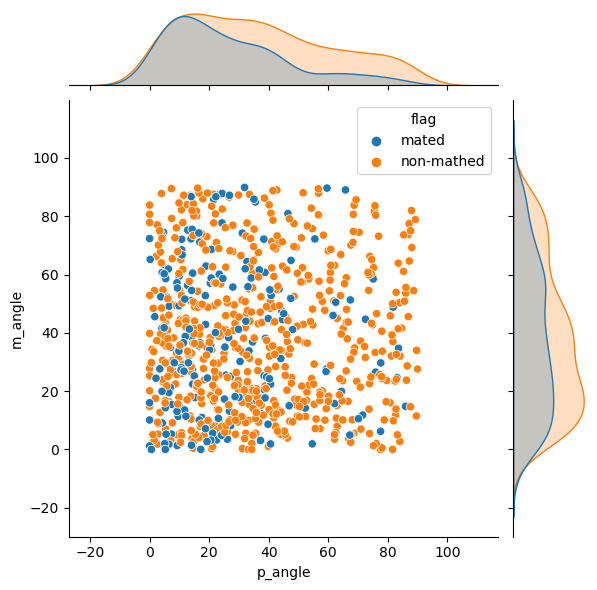

In [48]:
sns.jointplot(angles, x='p_angle', y='m_angle', hue='flag')
# plt.xticks([0,30,60,90])
# plt.yticks([0,30,60,90])
# plt.savefig("/media/wd/T7/data/mating_all/figs/anlges.png")
plt.show()

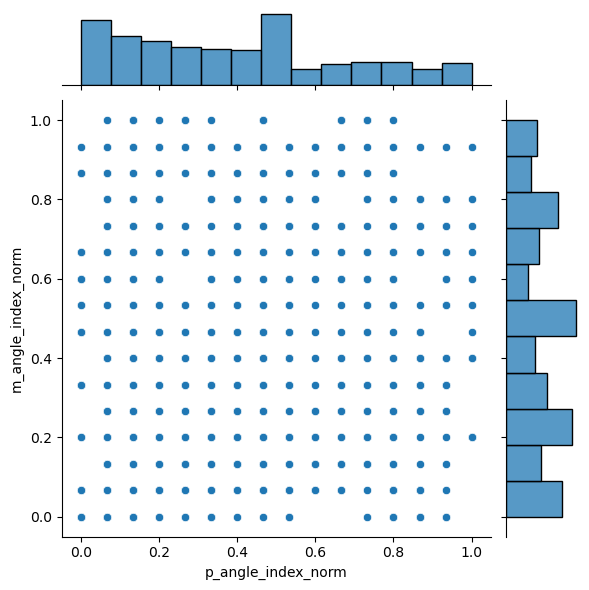

In [36]:
sns.jointplot(angles, x='p_angle_index_norm', y='m_angle_index_norm')
# plt.xticks([0,30,60,90])
# plt.yticks([0,30,60,90])
# plt.savefig("/media/wd/T7/data/mating_all/figs/anlges.png")
plt.show()

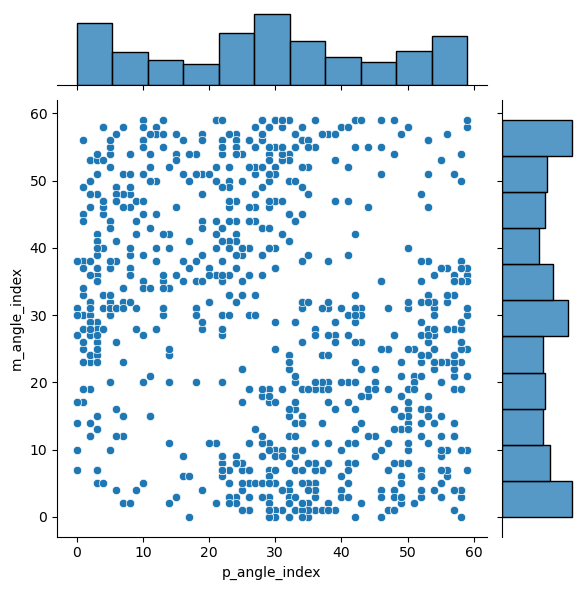

In [37]:
sns.jointplot(angles, x='p_angle_index', y='m_angle_index')

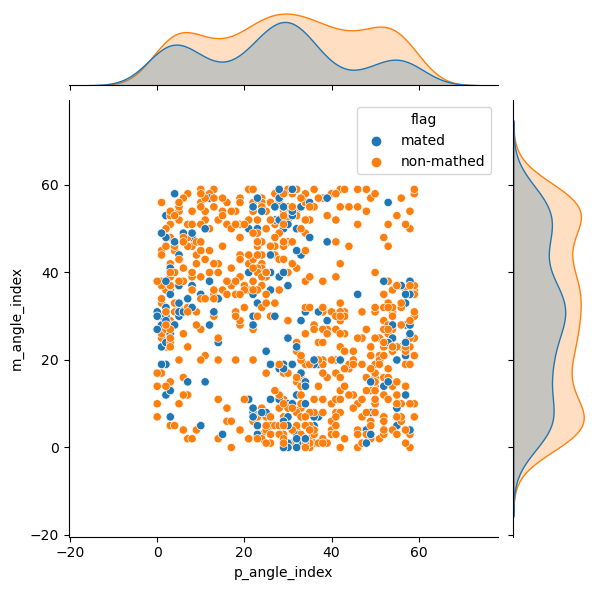

In [38]:
sns.jointplot(angles, x='p_angle_index', y='m_angle_index', hue='flag')
# plt.xticks([0,30,60,90])
# plt.yticks([0,30,60,90])
# plt.savefig("/media/wd/T7/data/mating_all/figs/anlges.png")
plt.show()

In [33]:
data_table = all_obj
names = np.unique(all_obj.image)
name_maps = {}
for i, j in enumerate(names):
    name_maps[j] = i
data_table['image_id'] = data_table['image'].map(name_maps)

In [149]:
for i in range(0, 50):
    group = data_table[data_table.image_id == i]
    center_order = (group.center_dist - group.center_dist.min()) / (group.center_dist.max() - group.center_dist.min())
    near_order = (group.nearest_dist - group.nearest_dist.min()) / (group.nearest_dist.max() - group.nearest_dist.min())
    data_table.loc[group.index, 'center_norm'] = center_order
    data_table.loc[group.index, 'center_order'] = (np.argsort(center_order)+1) / len(center_order)
    data_table.loc[group.index, 'near_norm'] = near_order
    data_table.loc[group.index, 'near_order'] = (np.argsort(near_order)+1) / len(near_order)

In [152]:
distance = data_table[["image_id","nearest_dist","center_dist","near_norm", "center_norm", "center_order","near_order","flag"]].copy()
distance = distance[distance.nearest_dist < 20]
index = list(set(distance[~distance.flag].sample(80).index).union(set(distance[distance.flag].index)))
distance = distance.loc[index]
distance.flag = distance.flag.map({True:"mated",False:"non-mathed"})

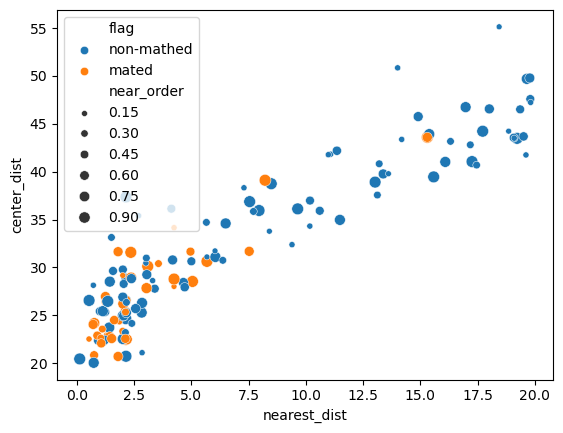

In [153]:
sns.scatterplot(distance, x='nearest_dist', y='center_dist', hue='flag',size='near_order')
# plt.savefig("/media/wd/T7/data/mating_all/figs/distance_vs_order.png")
plt.show()

<Axes: xlabel='nearest_dist', ylabel='near_order'>

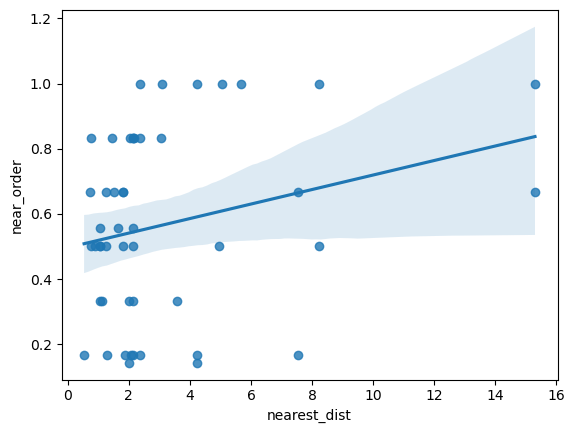

In [154]:
sns.regplot(distance[distance.flag=='mated'], x='nearest_dist', y='near_order')
# plt.savefig("/media/wd/T7/data/mating_all/figs/distance_threshold.png")


In [155]:
ecce = data_table[["p_eccentricity", "m_eccentricity","flag"]].copy()
index = list(set(ecce[~ecce.flag].sample(60).index).union(set(ecce[ecce.flag].index)))
ecce = ecce.loc[index]
ecce.flag = ecce.flag.map({True:"mated",False:"non-mathed"})

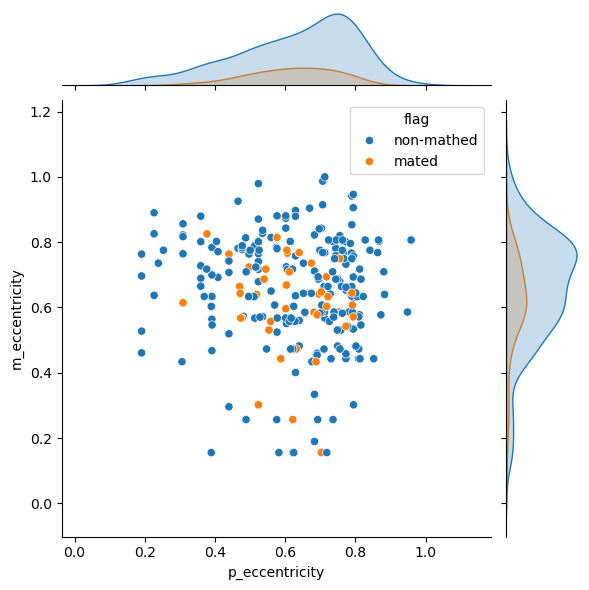

In [156]:
sns.jointplot(ecce, x='p_eccentricity', y='m_eccentricity', hue='flag')
# plt.xticks([0,30,60,90])
# plt.yticks([0,30,60,90])
# plt.savefig("/media/wlli/T7/data/mating_all/figs/m_eccentricity.png")
plt.show()

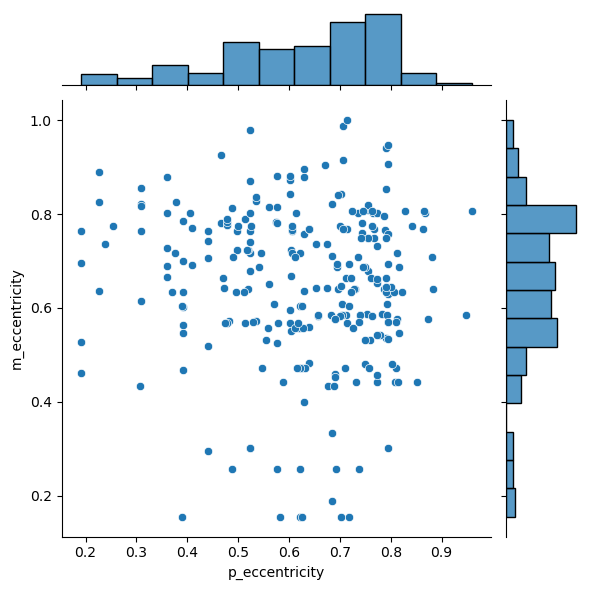

In [157]:
sns.jointplot(ecce, x='p_eccentricity', y='m_eccentricity')
# plt.savefig("/media/wlli/T7/data/mating_all/figs/m_eccentricitybackground.png")


In [158]:
times = data_table[["p_start", "m_start","flag"]].copy()
times["diff_t"] = times['p_start'] - times['m_start']
# times = times.loc[times.diff_t != 0]
index = list(set(times[~times.flag].sample(50).index).union(set(times[times.flag].index)))
times = times.loc[index]
times.flag = times.flag.map({True:"mated",False:"non-mathed"})

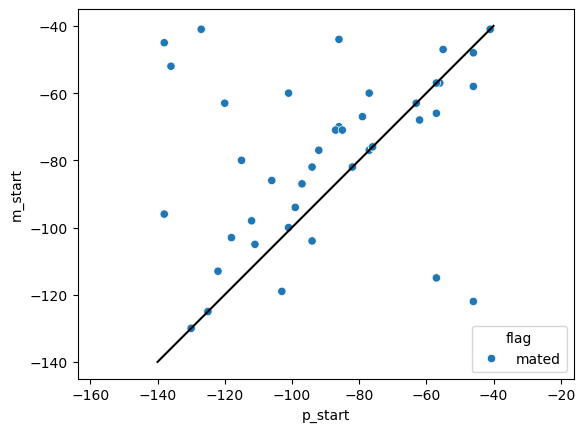

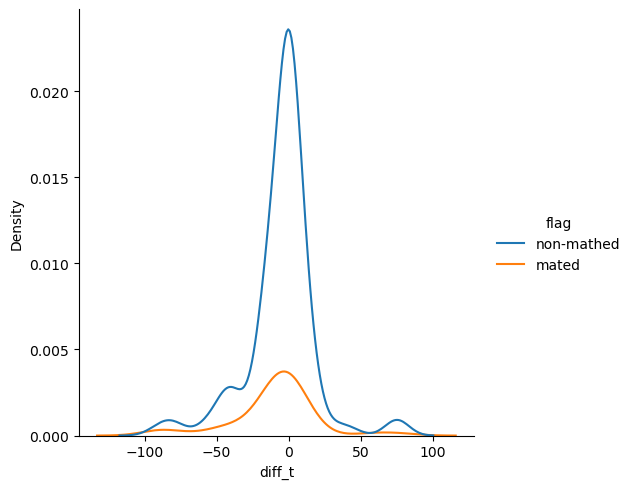

In [160]:
sns.scatterplot(times[times.flag=='mated'], x='p_start', y='m_start', hue='flag')
plt.plot([-140,-40],[-140,-40],'black')
plt.axis('equal')

g1 = times[times["flag"]=="mated"].diff_t
g2 = times[times["flag"]!="mated"].diff_t
# f_sta,p_value = f_oneway(g1, g2)
# print(p_value, f_sta)
sns.displot(times,x='diff_t',hue='flag',kind='kde')

(-142.85, -36.15, -141.8, -36.2)

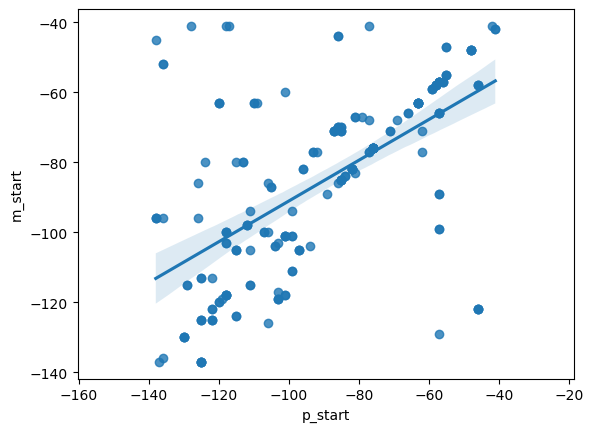

In [161]:
sns.regplot(times[times["flag"]!="mated"], x='p_start', y='m_start')
plt.axis('equal')

#### prediction

In [173]:
from sklearn.cluster import KMeans
import numpy as np
import numpy as np
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [169]:
data_table.columns

Index(['p', 'm', 'p_start', 'p_area', 'p_axis', 'p_eccentricity', 'm_start',
       'm_area', 'm_axis', 'm_eccentricity', 'neighbor_m', 'neighbor_p',
       'p_angle', 'm_angle', 'p_angle_index', 'm_angle_index', 'center_dist',
       'nearest_dist', 'flag', 'ref', 'image', 'image_id', 'center_norm',
       'center_order', 'near_norm', 'near_order'],
      dtype='object')

In [170]:
pre_data = data_table[["p_start","m_start","p_angle", "p_angle_index","m_angle", "m_angle_index", "nearest_dist",
                       "center_dist","near_norm", "center_norm", "center_order","near_order", "p_eccentricity",
                       "neighbor_m", "neighbor_p",
                       "m_eccentricity", "flag"]].copy()
pre_data['diff_t'] = pre_data['p_start'] - pre_data['m_start']
pre_data = pre_data[pre_data.nearest_dist < 20]
index = list(set(pre_data[~pre_data.flag].sample(90).index).union(set(pre_data[pre_data.flag].index)))
# ecce = ecce.loc[index]
# ecce.flag = ecce.flag.map({True:"mated",False:"non-mathed"})

In [171]:
X = pre_data.iloc[:,list(np.arange(0,14))+[15]]
Y = pre_data.loc[:,'flag']
Y = Y.map({True:"mated",False:"non-mathed"})
scaler = preprocessing.StandardScaler().fit(X)
StandardScaler()
X_scaled = scaler.transform(X)

<Axes: >

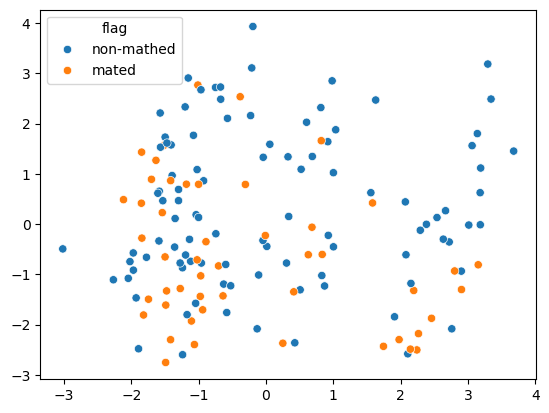

In [175]:
pca= PCA(n_components=2, svd_solver='full')
fit = pca.fit(X_scaled)
X_trans = fit.fit_transform(X_scaled)
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1],hue=Y)

In [176]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_scaled)
kmeans.labels_

kmeans.predict(X_scaled)

X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=10).fit_transform(X_scaled)
X_embedded.shape

(148, 2)

<Axes: >

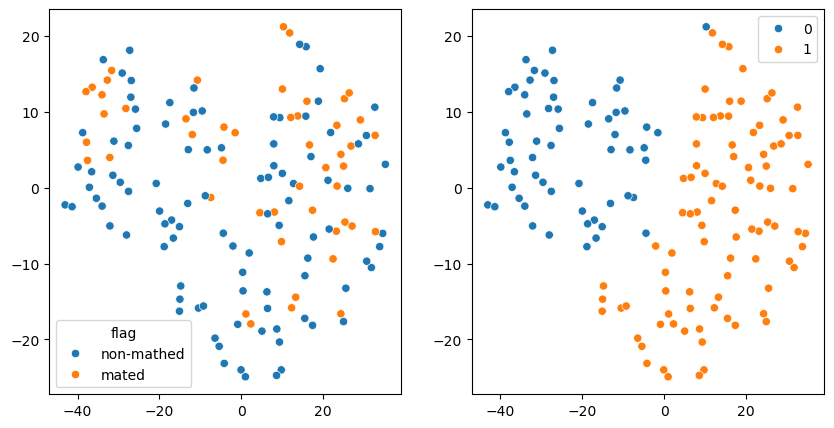

In [177]:
fig,axs = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1],hue=Y,ax=axs[0])
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1],hue=kmeans.labels_,ax=axs[1])

In [178]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc = clf.fit(X_scaled, Y)

pred = svc.predict(X_scaled)

<Axes: >

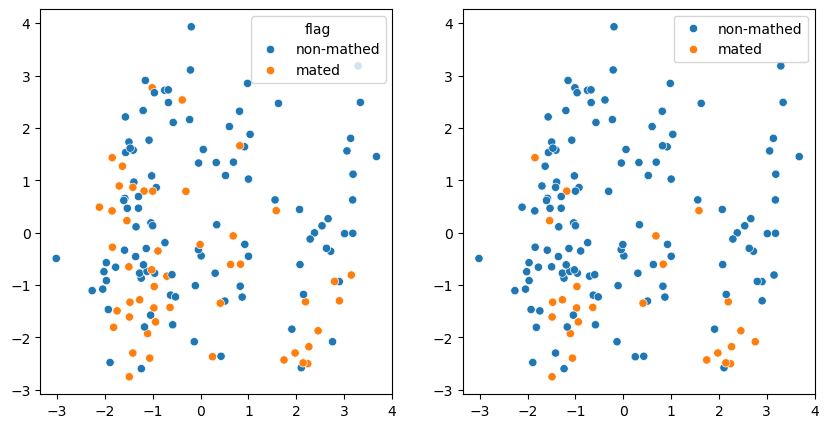

In [179]:
fig,axs = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1],hue=Y,ax=axs[0])
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1],hue=pred)

In [223]:
ep = data_table.loc[data_table.image_id==3]
ep

,p,m,p_start,p_area,p_axis,p_eccentricity,m_start,m_area,m_axis,m_eccentricity,...,center_dist,nearest_dist,flag,ref,image,image_id,center_norm,center_order,near_norm,near_order
0,24,16,-125,608.0,31.261475,0.606544,-125,504.0,31.763647,0.766489,...,43.589648,15.303166,True,24,20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...,3,0.725123,1.000000,0.663401,1.000000
1,24,20,-125,608.0,31.261475,0.606544,-125,543.0,31.644019,0.716786,...,35.912762,10.606705,False,24,20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...,3,1.000000,0.500000,1.000000,0.500000
2,24,23,-125,608.0,31.261475,0.606544,-125,567.0,33.756034,0.764706,...,52.540021,23.008780,False,24,20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...,3,0.441284,0.833333,0.481967,0.166667
3,18,16,-125,674.0,37.466231,0.788806,-125,504.0,31.763647,0.766489,...,23.714495,1.417156,False,16,20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...,3,0.801916,0.166667,0.766491,0.833333
4,24,16,-125,608.0,31.261475,0.606544,-125,504.0,31.763647,0.766489,...,43.589648,15.303166,True,16,20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...,3,0.707184,0.666667,0.738784,0.666667


In [224]:
y = ep.flag
x = ep[["p_start","m_start","p_angle", "p_angle_index","m_angle", "m_angle_index", "nearest_dist",
                       "center_dist","near_norm", "center_norm", "center_order","near_order", "p_eccentricity",
                       "neighbor_m", "neighbor_p",
                       "m_eccentricity",]]


<Axes: xlabel='neighbor_p', ylabel='neighbor_m'>

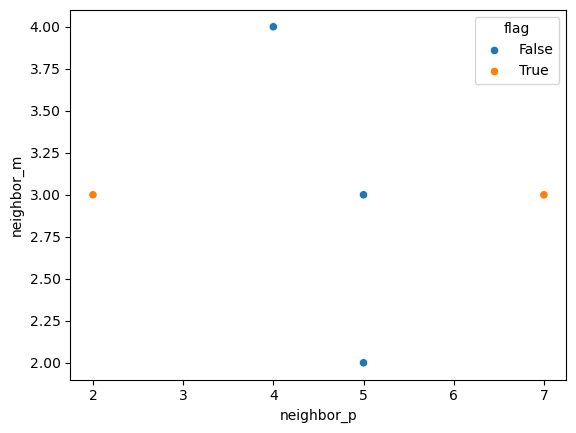

In [225]:
sns.scatterplot(ep,x='neighbor_p',y='neighbor_m',hue='flag')

<Axes: >

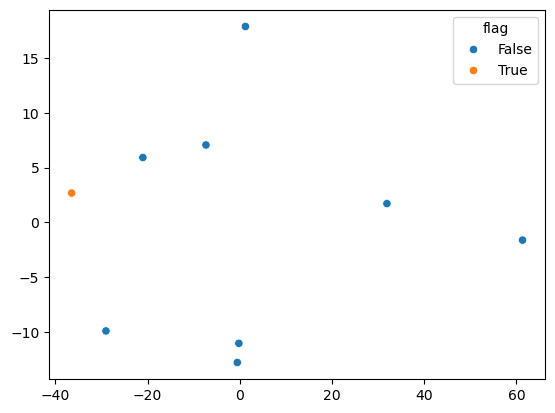

In [202]:
pca= PCA(n_components=2, svd_solver='full')
fit = pca.fit(ep)
X_trans = fit.fit_transform(ep)
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1],hue=y)

<Axes: xlabel='neighbor_p', ylabel='neighbor_m'>

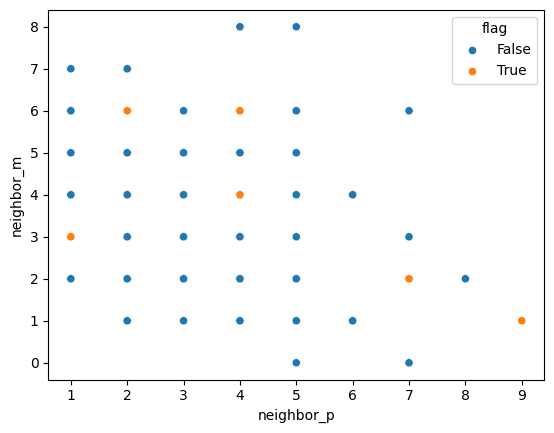

In [233]:
d1= all_obj[all_obj.ref == all_obj.p]
sns.scatterplot(d1,x='neighbor_p',y='neighbor_m',hue='flag')

<Axes: xlabel='neighbor_m', ylabel='neighbor_p'>

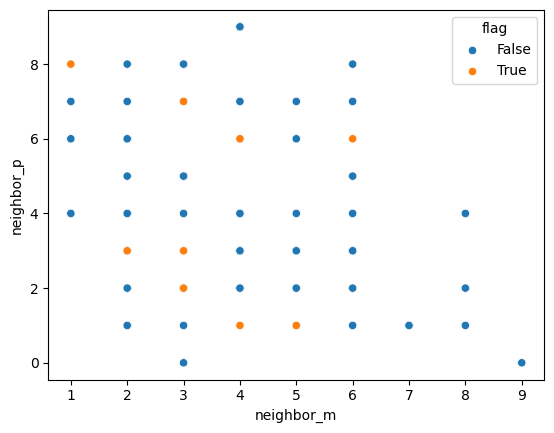

In [234]:
d1= all_obj[all_obj.ref == all_obj.m]
sns.scatterplot(d1,x='neighbor_m',y='neighbor_p',hue='flag')

(array([[  3.,  26.,  65.,  95., 167., 193., 158., 150.,  28.,  23.],
        [ 12.,  20.,  26.,  74.,  87., 182., 203., 218.,  64.,  22.]]),
 array([0.13414399, 0.22072959, 0.30731519, 0.3939008 , 0.4804864 ,
        0.567072  , 0.6536576 , 0.7402432 , 0.8268288 , 0.9134144 ,
        1.        ]),
 <a list of 2 BarContainer objects>)

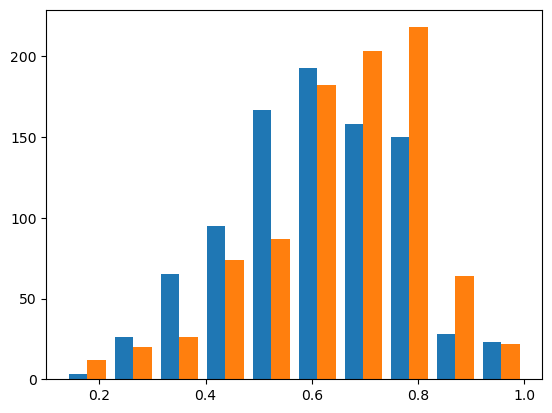

In [132]:
plt.hist(all_obj[['p_eccentricity','m_eccentricity']])

In [134]:
all_obj.keys()

Index(['index', 'p', 'm', 'p_type', 'm_type', 'p_start', 'p_area', 'p_axis',
       'p_eccentricity', 'm_start', 'm_area', 'm_axis', 'm_eccentricity',
       'neighbor_m', 'neighbor_p', 'p_angle', 'm_angle', 'p_angle_index',
       'm_angle_index', 'center_dist', 'nearest_dist', 'flag', 'time_measure',
       'time_0', 'ref', 'image'],
      dtype='object')

In [135]:
all_obj[['p_eccentricity','m_eccentricity','p_axis']]

,p_eccentricity,m_eccentricity,p_axis
0,0.559940,0.814619,27.994335
1,0.559940,0.650157,27.994335
2,0.841773,0.775209,40.866311
3,0.699259,0.775209,34.275588
4,0.762872,0.775209,37.881296
...,...,...,...
903,0.667893,0.767558,48.570417
904,0.684300,0.621255,50.305300
905,0.684300,0.813913,50.305300
906,0.809144,0.641528,54.751724


In [54]:
angles = all_obj[["p","p_angle", "m","m_angle","flag","image"]].copy()

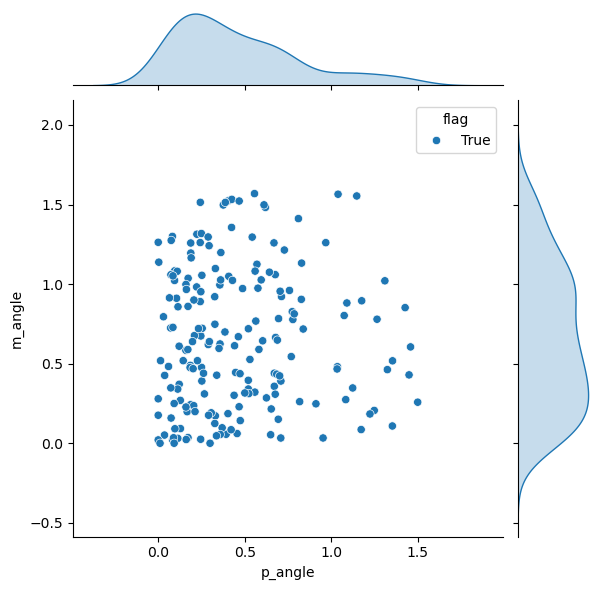

In [55]:
angles = angles.drop_duplicates()
sns.jointplot(angles.loc[angles.flag], x='p_angle', y='m_angle', hue='flag')